LIBS

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

DEFAULTS

In [2]:
# Define path to files
# For MacOS
# PATH = "/Users/derekbanas/Documents/Tutorials/Python for Finance/Stocks/"
# For Windows
PATH = "C:/Users/yeerd/OneDrive/Masaüstü/stock_data/Stock_List/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = "2017-01-03"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = "2021-08-19"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

risk_free_rate = 0.0125 # Approximate 10 year bond rate

STOCK NAMES 

In [3]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 2886 total stocks
tickers.sort()
len(tickers)

2910

DF FROM CSV

In [4]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

MERGE MULTIPLE STOCKS

In [5]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

PORTFOLIO

In [6]:
# I used the calculations made in part 4 of this course to pick the best performing
# stocks in the main sectors in the year 2018 through 2019
# I made slight changes in those situations that allowed me to pick companies I knew
port_list = ["GNRC", "DXCM", "AMD", "NFLX", "COST", "TGT", "AES", "MSCI", 
             "NEM", "AMT", "HES"]

MERGE PORTFOLIO

In [11]:
mult_df = merge_df_by_column_name('Adj Close',  '2018-01-01', 
                                  '2021-09-01', *port_list)
mult_df


,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
Date,,,,,,,,,,,
2018-01-02,48.029999,57.990002,10.980000,201.070007,177.262619,61.534168,9.602743,122.988037,34.842434,131.830887,44.896355
2018-01-03,49.730000,58.080002,11.550000,205.050003,179.389923,61.115635,9.593917,124.856758,34.550255,132.344604,46.350681
2018-01-04,50.070000,52.250000,12.120000,205.630005,177.996857,59.914604,9.558611,126.821793,34.933739,130.410995,47.467228
2018-01-05,50.410000,53.259998,11.880000,209.990005,176.726089,60.551525,9.593917,128.141449,35.061573,131.251709,48.940315
2018-01-08,49.529999,55.439999,12.280000,212.050003,177.413223,61.124729,9.593917,128.314835,35.025055,132.652847,49.249950
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-13,414.100006,491.410004,110.550003,515.919983,447.820007,260.645508,24.790001,630.020020,58.840000,282.920013,69.940002
2021-08-16,410.190002,506.179993,107.480003,517.919983,452.859985,262.250000,24.360001,630.210022,58.880001,283.200012,67.459999
2021-08-17,389.989990,510.239990,107.559998,518.909973,452.339996,254.649994,24.090000,629.479980,58.860001,286.529999,66.400002


PLOTTING ROIs

<AxesSubplot:xlabel='Date'>

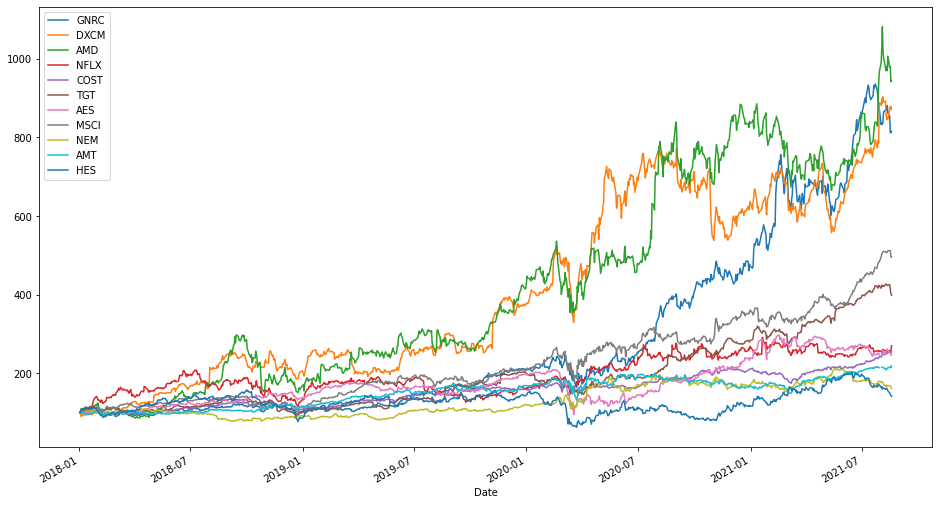

In [8]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16, 9))

MEAN RETURNS

In [9]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

GNRC    0.578732
DXCM    0.597018
AMD     0.619089
NFLX    0.274267
COST    0.259455
TGT     0.381402
AES     0.246377
MSCI    0.441516
NEM     0.133378
AMT     0.215506
HES     0.095975
dtype: float64

COVARIANCE

In [12]:
returns.cov() * 252

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
GNRC,0.159048,0.060652,0.086918,0.051833,0.036470,0.041980,0.065976,0.068446,0.025452,0.043105,0.080547
DXCM,0.060652,0.236929,0.094309,0.064583,0.029439,0.030518,0.044021,0.081398,0.021325,0.037144,0.058141
AMD,0.086918,0.094309,0.314569,0.103061,0.047713,0.058258,0.055554,0.095609,0.035233,0.041567,0.083046
NFLX,0.051833,0.064583,0.103061,0.170677,0.038972,0.031705,0.032486,0.064508,0.014220,0.031019,0.043284
COST,0.036470,0.029439,0.047713,0.038972,0.048985,0.034155,0.025714,0.036823,0.013398,0.030396,0.025294
TGT,0.041980,0.030518,0.058258,0.031705,0.034155,0.098423,0.038467,0.034876,0.009588,0.028748,0.041216
AES,0.065976,0.044021,0.055554,0.032486,0.025714,0.038467,0.145347,0.062602,0.022106,0.042471,0.094034
MSCI,0.068446,0.081398,0.095609,0.064508,0.036823,0.034876,0.062602,0.122698,0.026668,0.047721,0.069984
NEM,0.025452,0.021325,0.035233,0.014220,0.013398,0.009588,0.022106,0.026668,0.107647,0.021088,0.029660
AMT,0.043105,0.037144,0.041567,0.031019,0.030396,0.028748,0.042471,0.047721,0.021088,0.081274,0.038496


CORRELATION

In [13]:
returns.corr()

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
GNRC,1.000000,0.312442,0.388585,0.314596,0.413183,0.335527,0.434385,0.489969,0.194517,0.379528,0.370997
DXCM,0.312442,1.000000,0.345450,0.321162,0.273263,0.199850,0.237011,0.477403,0.133528,0.267441,0.219409
AMD,0.388585,0.345450,1.000000,0.444781,0.384364,0.331089,0.259698,0.486655,0.191466,0.259850,0.271984
NFLX,0.314596,0.321162,0.444781,1.000000,0.426213,0.244622,0.206047,0.445764,0.104911,0.263105,0.192450
COST,0.413183,0.273263,0.384364,0.426213,1.000000,0.491894,0.304565,0.474968,0.184505,0.481453,0.209929
TGT,0.335527,0.199850,0.331089,0.244622,0.491894,1.000000,0.321524,0.317370,0.093152,0.321332,0.241321
AES,0.434385,0.237011,0.259698,0.206047,0.304565,0.321524,1.000000,0.468613,0.176604,0.390763,0.452897
MSCI,0.489969,0.477403,0.486655,0.445764,0.474968,0.317370,0.468613,1.000000,0.232049,0.477706,0.366997
NEM,0.194517,0.133528,0.191466,0.104911,0.184505,0.093152,0.176604,0.232049,1.000000,0.225293,0.166057
AMT,0.379528,0.267441,0.259850,0.263105,0.481453,0.321332,0.390763,0.477706,0.225293,1.000000,0.247948


RANDOM PORTFOLIO WEIGHTS

In [14]:
# Generate 11 random values that sum to 1
weights = np.random.random(11)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.08203533 0.03029856 0.12845217 0.01813699 0.05494438 0.06529405
 0.06668914 0.08836822 0.19851091 0.10761062 0.15965965]
Total Weight : 1.0


RETURN OF PORTFOLIO

In [15]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.3096594796654048

Volatility

In [16]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.24725371534275412

ANALYSING 10k Combinations of weights

In [17]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(11)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.3836788 , 0.36142389, 0.34564026, ..., 0.31357784, 0.31633562,
        0.35418936]),
 array([0.26741892, 0.25466989, 0.23736824, ..., 0.24253753, 0.25409936,
        0.25412331]),
 array([1.388005  , 1.37010264, 1.40347446, ..., 1.24136598, 1.1957355 ,
        1.34458094]),
 array([[0.1343004 , 0.05144121, 0.17541057, ..., 0.0463747 , 0.12492567,
         0.09038928],
        [0.08857669, 0.0788807 , 0.21235136, ..., 0.23966053, 0.08442379,
         0.04220035],
        [0.10452464, 0.0622853 , 0.07106371, ..., 0.11009586, 0.14436007,
         0.0633666 ],
        ...,
        [0.12365603, 0.0130675 , 0.09533505, ..., 0.05638373, 0.16304245,
         0.11023418],
        [0.07460733, 0.00626801, 0.09552382, ..., 0.02717239, 0.1440076 ,
         0.1421651 ],
        [0.08732184, 0.13054218, 0.03634191, ..., 0.04665256, 0.07526585,
         0.15933448]]))

EFFICIENT FRONTIER

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

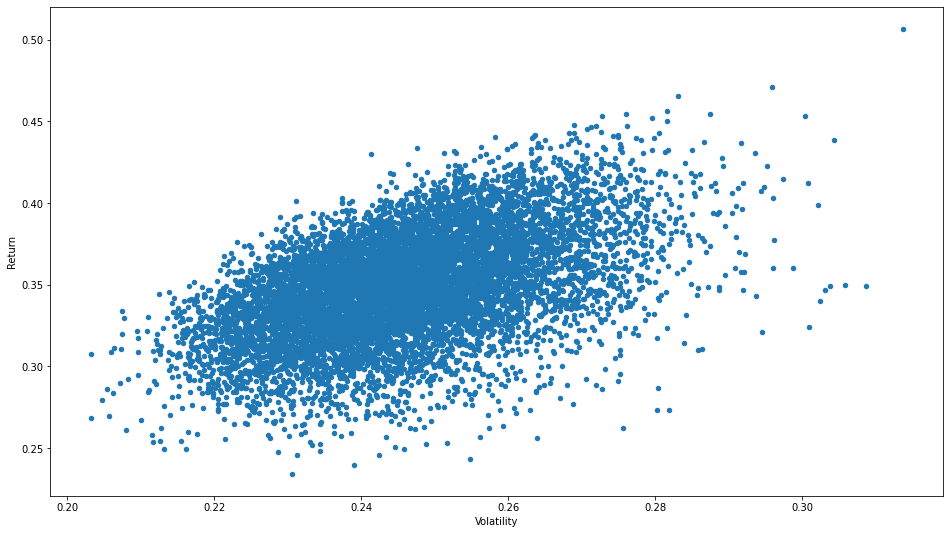

In [18]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

SHARPE RATIO

In [22]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < 11:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])
      
# Find return of that portfolio
print("Return :", p_ret[SR_idx])

Stock : GNRC : 21.91
Stock : DXCM : 22.71
Stock : AMD : 0.74
Stock : NFLX : 3.61
Stock : COST : 24.85
Stock : TGT : 19.30
Stock : AES : 2.48
Stock : MSCI : 0.53
Stock : NEM : 2.28
Stock : AMT : 1.47
Stock : HES : 0.11

Volatility : 0.24135799036441588
Return : 0.4297357155397479
